In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [5]:
print(X_test)

[[    36  33000]
 [    39  61000]
 [    36 118000]
 [    39 122000]
 [    26 118000]
 [    38  65000]
 [    20  36000]
 [    49  89000]
 [    31  18000]
 [    48 141000]
 [    34  72000]
 [    39  73000]
 [    35  72000]
 [    48 131000]
 [    53  82000]
 [    56 133000]
 [    60  83000]
 [    27  58000]
 [    28  87000]
 [    60 102000]
 [    40  75000]
 [    50  88000]
 [    44 139000]
 [    47  43000]
 [    45  26000]
 [    26  15000]
 [    58  47000]
 [    49  74000]
 [    53  34000]
 [    52 114000]
 [    39  42000]
 [    19  76000]
 [    18  86000]
 [    57  74000]
 [    27  84000]
 [    30  80000]
 [    22  18000]
 [    32  86000]
 [    50  20000]
 [    19  25000]
 [    47 144000]
 [    58 101000]
 [    34 115000]
 [    23  66000]
 [    56  60000]
 [    31 118000]
 [    48  35000]
 [    47 113000]
 [    39  79000]
 [    52  38000]
 [    24  58000]
 [    37  53000]
 [    42  80000]
 [    46  28000]
 [    42  73000]
 [    37  62000]
 [    60  42000]
 [    36  52000]
 [    58  9500

In [6]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

In [7]:
print(y_test)

[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0]


In [8]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression()

In [9]:
print(LogReg.predict(scaling.transform([[30,87000]])))

[0]


In [10]:
y_pred=LogReg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


<IPython.core.display.Javascript object>

0.83

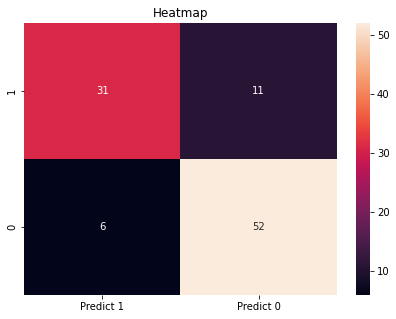

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred,labels=[1,0])

df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ['Predict 1','Predict 0']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)
plt.title('Heatmap')
accuracy_score(y_test, y_pred)